<a href="https://colab.research.google.com/github/ttezy/Time-Sequence-Analysis/blob/main/FB_Prophet_Multivariate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Step 1: Load Data**

## **Import libraries**

In [357]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
import plotly.express as px
from sklearn.preprocessing import LabelEncoder


from fbprophet import Prophet

from sklearn.metrics import mean_squared_error
from math import sqrt

## **Load Dataset**

In [358]:
df=pd.read_csv('pollution.csv',header=0, index_col=0)
df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


## **Visualize the data**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f22e3146d50>,
      dtype=object)

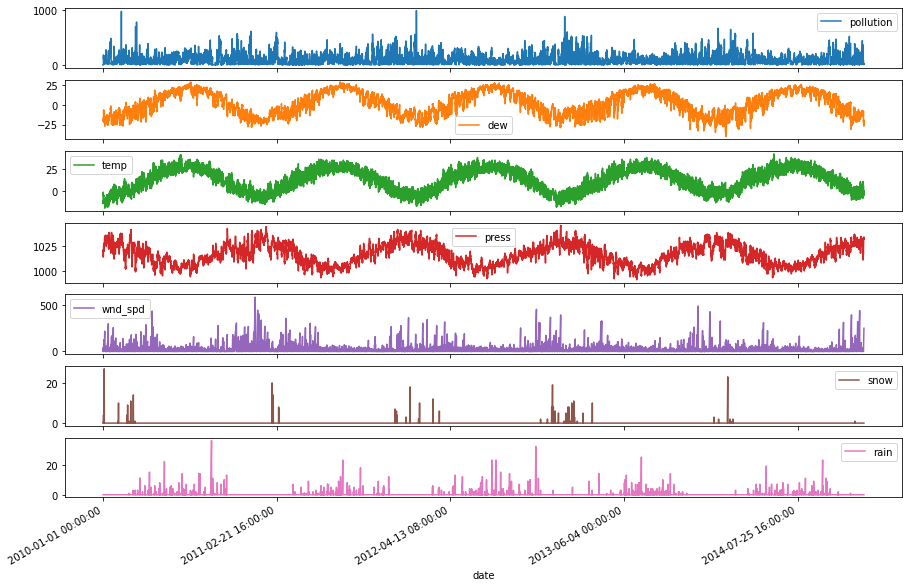

In [359]:
df.plot(subplots=True, figsize=(15,10), legend=True)

# **Step 2: Preprocess the data**

## **Encode wind direction**

In [360]:
values = df.values
# integer encode direction
encoder = LabelEncoder()
values[:, 4] = encoder.fit_transform(values[:, 4])
# ensure all data is float
values = values.astype('float32')

df['wnd_dir'] = values[:, 4]

df.head()

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,1.0,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,1.0,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,1.0,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,1.0,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,1.0,12.97,0,0


## **Rename "date" as "ds" and "pollution" with "y"**

In [361]:
df_processed = df.reset_index().rename({'date':'ds', 'pollution':'y'}, axis='columns')
df_processed.head()

,ds,y,dew,temp,press,wnd_dir,wnd_spd,snow,rain
0,2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,1.0,1.79,0,0
1,2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,1.0,4.92,0,0
2,2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,1.0,6.71,0,0
3,2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,1.0,9.84,0,0
4,2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,1.0,12.97,0,0


## **Split the train set and the test set**

In [362]:
# use first 90% data to train
n_train_hours = int(len(df_processed) * 0.9)
train = df_processed[:n_train_hours]
test = df_processed[n_train_hours:]

y_true = test['y'].values
test = test.drop(['y'], axis=1)

print("train shape:", train.shape)
print("test shape:", test.shape)
print("y_true shape:", y_true.shape)

train shape: (39441, 9)
test shape: (4383, 8)
y_true shape: (4383,)


# **Step 3: Train Prophet Model by past 1 step**

## **Show the columns' name**

In [363]:
print(df_processed.columns)

Index(['ds', 'y', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow',
       'rain'],
      dtype='object')


## **Build prophet model**

In [364]:
# model = Prophet(interval_width=0.95)

# # modify here to choose variates
# model.add_regressor('dew')
# model.add_regressor('temp')
# model.add_regressor('press')
# model.add_regressor('wnd_dir')
# model.add_regressor('wnd_spd')
# model.add_regressor('snow')

## **Fit model to the. train data**

In [365]:
# model.fit(train)

In [366]:
# model.params

# **Step 4: Implement data forecasting by past 1 step**

## **Show the test set info**

In [367]:
# test.head()

## **Predict future value**

In [368]:
# result = model.predict(test)
# prediction = result['yhat']
# print("prediction shape:", prediction.shape)

## **Calculate RMSE**

In [369]:
# rmse = sqrt(mean_squared_error(prediction, y_true))
# print('Test RMSE: %.3f' % rmse)

## **Show prediction results**

In [370]:
# plt.figure(figsize=(15, 8))
# plt.plot(y_true[:200], label='Ground Truth')
# plt.plot(prediction[:200], label='Prediction')
# plt.title("FB Prophet")
# plt.legend()
# plt.show()

In [371]:
# plt.figure(figsize=(25, 5))
# plt.plot(y_true[:2000], label='Ground Truth')
# plt.plot(prediction[:2000], label='Prediction')
# plt.title("FB Prophet")
# plt.legend()
# plt.show()

In [372]:
# model.plot(result)

In [373]:
# model.plot_components(result)

# **Step 5: Train prophet model and predict future 1 step by past 24 steps**

## **Reframe dataset for supervised learning**

In [374]:
# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j + 1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i)[0])
        if i == 0:
            names += ['var1(t)' ]
        else:
            names += [('var1(t+%d)' % (i))]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [375]:
pastStep = 24 # modify here to choose past steps
maxFutureStep = 24  # modify here to choose future steps
futureStep = 1

# frame as supervised learning
reframed = series_to_supervised(df.values, pastStep, futureStep)
reframed['ds'] = df_processed['ds'][pastStep:]
reframed_processed = reframed.rename({'var1(t)':'y'}, axis='columns')


print(reframed_processed.shape)
print(reframed_processed.head())

(43800, 194)
    var1(t-24)  var2(t-24)  var3(t-24)  ...  var8(t-1)      y                   ds
24         0.0       -21.0       -11.0  ...        0.0  129.0  2010-01-02 00:00:00
25         0.0       -21.0       -12.0  ...        0.0  148.0  2010-01-02 01:00:00
26         0.0       -21.0       -11.0  ...        0.0  159.0  2010-01-02 02:00:00
27         0.0       -21.0       -14.0  ...        0.0  181.0  2010-01-02 03:00:00
28         0.0       -20.0       -12.0  ...        0.0  138.0  2010-01-02 04:00:00

[5 rows x 194 columns]


## **Split the train set and the test set**

In [376]:
# use first 90% data to train
n_train_hours = int(len(df_processed) * 0.9)
train = reframed_processed[:n_train_hours]
test = reframed_processed[n_train_hours:]

y_true = test['y'].values
test = test.drop(['y'], axis=1)

print("train shape:", train.shape)
print("test shape:", test.shape)
print("y_true shape:", y_true.shape)

train shape: (39441, 194)
test shape: (4359, 193)
y_true shape: (4359,)


## **Train the model by using past 24 steps**

In [377]:
model = Prophet(interval_width=0.95)

names = list()
for i in range(pastStep, 0, -1):
  names += [('var%d(t-%d)' % (j + 1, i)) for j in range(8)]

for variable in names:
  model.add_regressor(variable)

In [378]:
model.fit(train[-30:])

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 23.


## **Implement prediction**

In [379]:
result = model.predict(test)
prediction = result['yhat']
print("prediction shape:", prediction.shape)

prediction shape: (4359,)


## **Calculate RMSE**

In [380]:
rmse = sqrt(mean_squared_error(prediction, y_true))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 59589.079


## **Show prediction results**

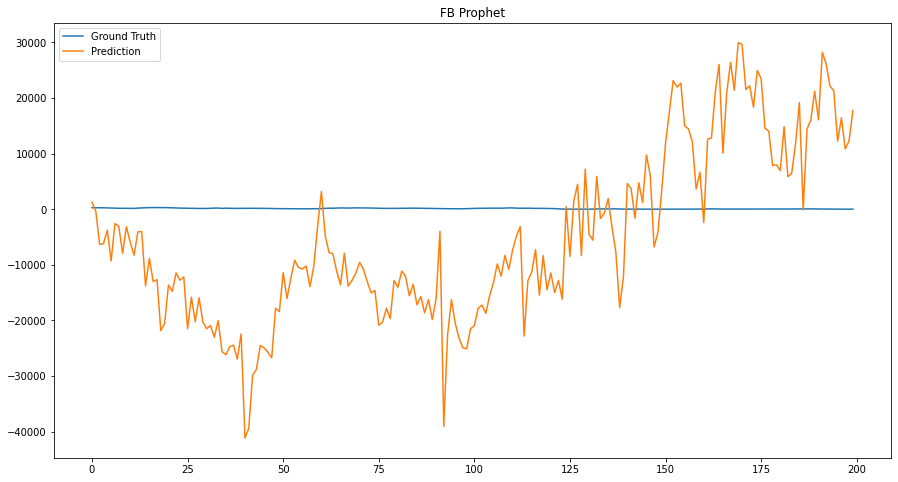

In [381]:
plt.figure(figsize=(15, 8))
plt.plot(y_true[:200], label='Ground Truth')
plt.plot(prediction[:200], label='Prediction')
plt.title("FB Prophet")
plt.legend()
plt.show()

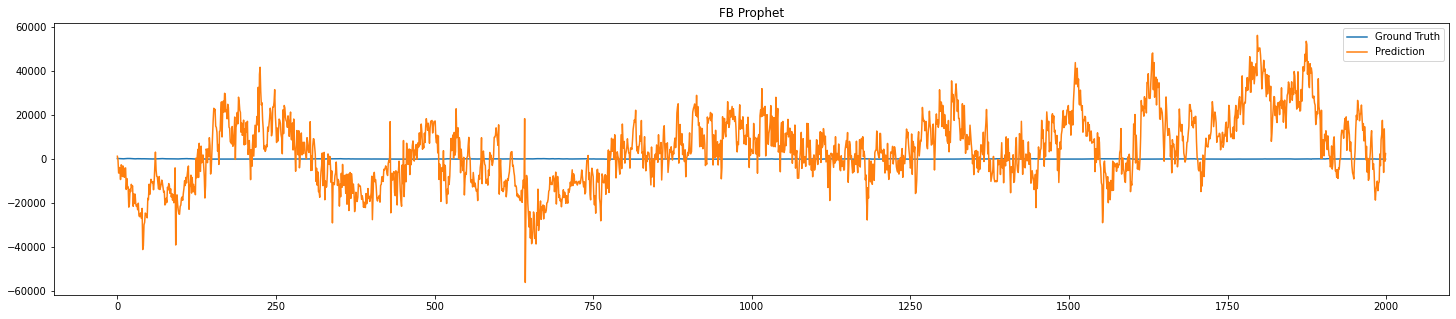

In [382]:
plt.figure(figsize=(25, 5))
plt.plot(y_true[:2000], label='Ground Truth')
plt.plot(prediction[:2000], label='Prediction')
plt.title("FB Prophet")
plt.legend()
plt.show()

# **Step 6: Train prophet model and predict future several steps by past 24 steps**

## **Split the train set and test set**

In [383]:
# use first 90% data to train
n_train_hours = int(len(df_processed) * 0.9)
train = df_processed[:n_train_hours]
test = df_processed[n_train_hours:]

y_true = test['y'].values
test = test.drop(['y'], axis=1)

print("train shape:", train.shape)
print("test shape:", test.shape)
print("y_true shape:", y_true.shape)

train shape: (39441, 9)
test shape: (4383, 8)
y_true shape: (4383,)


In [384]:
dew_train = train[['dew', 'ds']].rename({'dew':'y'}, axis='columns')
temp_train = train[['temp', 'ds']].rename({'temp':'y'}, axis='columns')
press_train = train[['press', 'ds']].rename({'press':'y'}, axis='columns')
wnd_dir_train = train[['wnd_dir', 'ds']].rename({'wnd_dir':'y'}, axis='columns')
wnd_spd_train = train[['wnd_spd', 'ds']].rename({'wnd_spd':'y'}, axis='columns')
snow_train = train[['snow', 'ds']].rename({'snow':'y'}, axis='columns')

In [385]:
dew_test = test[['dew', 'ds']].rename({'dew':'y'}, axis='columns')
temp_test = test[['temp', 'ds']].rename({'temp':'y'}, axis='columns')
press_test = test[['press', 'ds']].rename({'press':'y'}, axis='columns')
wnd_dir_test = test[['wnd_dir', 'ds']].rename({'wnd_dir':'y'}, axis='columns')
wnd_spd_test = test[['wnd_spd', 'ds']].rename({'wnd_spd':'y'}, axis='columns')
snow_test = test[['snow', 'ds']].rename({'snow':'y'}, axis='columns')

In [386]:
def var_prediction(var_name, dataset, trainingSize, predSize, futureStep):
  prediction = np.array([])
  if predSize > len(test):
    predSize = len(test)
  for i in range(0, predSize, futureStep):
    var_train = dataset[[var_name, 'ds']][n_train_hours-trainingSize+i:n_train_hours+i].rename({var_name:'y'}, axis='columns')  #-100:0
  
    var_model = Prophet(interval_width=0.95)
    var_model.fit(var_train)

    future = var_model.make_future_dataframe(periods = futureStep, include_history = False)
    pred = var_model.predict(future)
    prediction = np.append(prediction, pred['yhat'].values)
  return prediction

In [387]:
df_processed.columns

Index(['ds', 'y', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow',
       'rain'],
      dtype='object')

In [388]:
pastStep = 24 # modify here to choose past steps
maxFutureStep = 24  # modify here to choose future steps

#for futureStep in range(1, maxFutureStep+1, 1):
prediction = pd.DataFrame()
futureStep = 5
trainingSize = 1000
predSize = 200
var_names = [x for x in df_processed.columns if (x != 'ds' and x!= 'y')]
for var in var_names:
  var_pred = var_prediction(var, df_processed, trainingSize, predSize, futureStep)
  prediction[var] = var_pred

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with ye

In [389]:
for var in var_names:
  rmse = sqrt(mean_squared_error(test[var][:predSize].values, prediction[var][:predSize].values))
  print('Test RMSE of %10s : %.3f' % (var, rmse))

Test RMSE of        dew : 5.652
Test RMSE of       temp : 4.166
Test RMSE of      press : 3.226
Test RMSE of    wnd_dir : 0.849
Test RMSE of    wnd_spd : 20.587
Test RMSE of       snow : 0.000
Test RMSE of       rain : 0.247


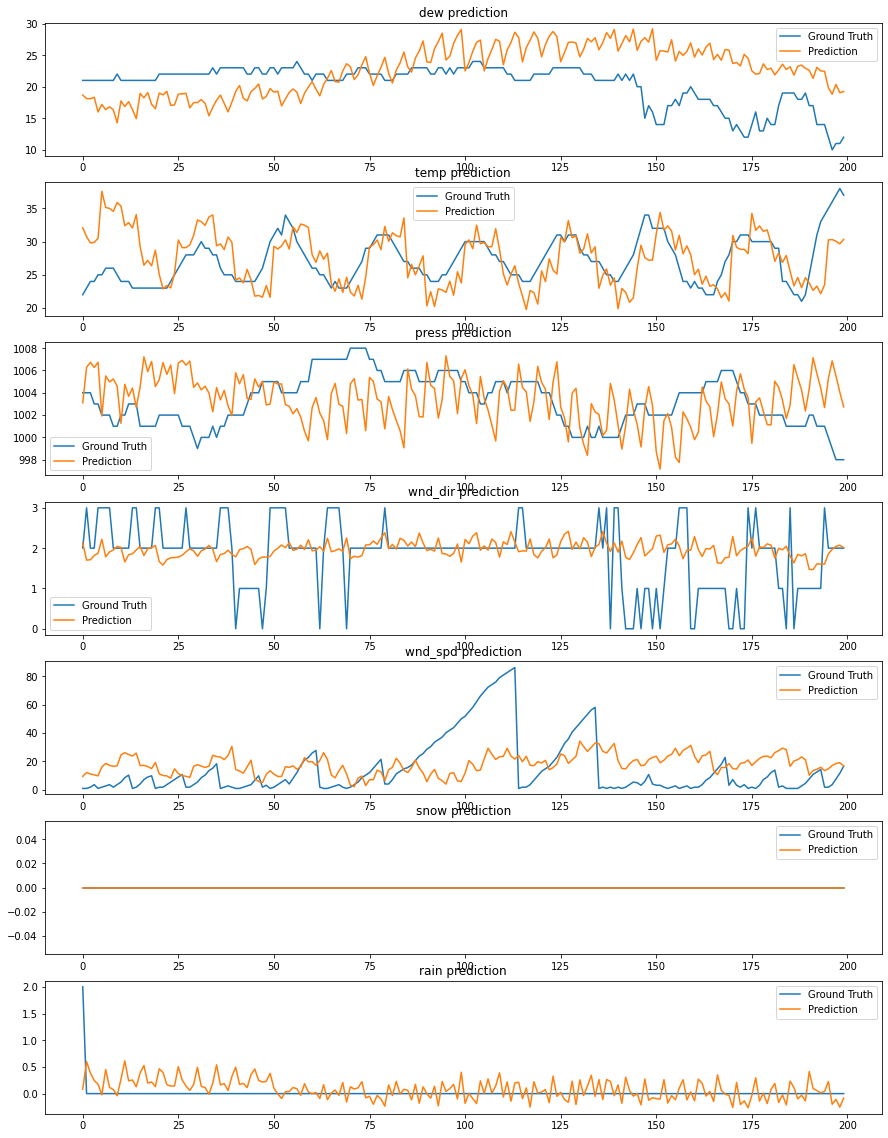

In [390]:
plt.figure(figsize=(15, 10*7))
i = 1
for var in var_names:
  plt.subplot(24, 1, i)
  i += 1
  plt.plot(test[var][:predSize].values, label='Ground Truth')
  plt.plot(prediction[var][:predSize].values, label='Prediction')
  plt.title(var + " prediction")
  plt.legend()
plt.show()